<a href="https://colab.research.google.com/github/Jesyldah/Projects/blob/main/Project_Apache_Spark_DataFrames_Jesyldah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apache Spark DataFrames Project

## 1. Defining the Question


### a) Specifying the Data Analysis Question

Perform an analysis on Safaricom stock market data from the years 2012-2016

### b) Defining the Metric for Success

The analysis question will be answered by answering questions about some stock market data on Safaricom from the years 2012-2016

### c) Understanding the context 

As a Data professional, you need to perform an analysis by answering questions about
some stock market data on Safaricom from the years 2012-2016





### d) Recording the Experimental Design

1. Data Importation and Exploration
2. Data Preparation
3. Data Analysis



### e) Data Relevance

The dataset includes Safaricom stock market daily data for the period Jan 2012 - Dec 2016, and is therefore relevant in answering the research question

The dataset contains the following info on the daily stock trades:
* Date - The calender date
* Open - Opening price on the stock
* High - The maximum value reached by the stock 
* Low - The minimum price of the stock
* Close - Closing price of the stock
* Volume - The number of shares that exchange hands for the stock 
* Adj Close - Price value that incorporates changes resulting from corporate actions such as dividend payments, stock splits, or new share issuance.

## 2. Data Importation and Exploration

### Start a spark session and load the stock file while inferring the data types.

In [1]:
# Installing pyspark
!pip install pyspark


     |████████████████████████████████| 281.3 MB 39 kB/s 
     |████████████████████████████████| 198 kB 34.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=75df74c18586bcf362fe53cfdc0a4af473a32a40aa6fb770ec41e0eb49d244ec
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [2]:
# Run a local spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext


In [ ]:
# Upload the dataset
from google.colab import files
files.upload()


In [4]:
# Import SQLContext from the pyspark.sql library
from pyspark.sql import SQLContext

# Instantiate the SQLContext object and assign it to the variable sqlCtx.
# Pass in the SparkContext object `sc`
sqlCtx = SQLContext(sc)

# Read in the data into a DataFrame object `saf_stock_df`
saf_stock_df = sqlCtx.read.format("csv").option("header","true").load("saf_stock.csv")

# Print the type
print(type(saf_stock_df))


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


<class 'pyspark.sql.dataframe.DataFrame'>


### Determine the column names

In [5]:
# Display the DataFrame columns
saf_stock_df.columns


['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

The column names are: 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', and 'Adj Close'

### Make observations about the schema

In [6]:
# Display the schema for the DataFrame
saf_stock_df.printSchema()


root
 |-- Date: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- Volume: string (nullable = true)
 |-- Adj Close: string (nullable = true)



The dataframe has 7 columns, all of 'string' datatype and nullable

### Show the first 5 rows

In [7]:
# Display the first 5 rows
saf_stock_df.show(5)


+----------+------------------+---------+---------+------------------+--------+------------------+
|      Date|              Open|     High|      Low|             Close|  Volume|         Adj Close|
+----------+------------------+---------+---------+------------------+--------+------------------+
|2012-01-03|         59.970001|61.060001|59.869999|         60.330002|12668800|52.619234999999996|
|2012-01-04|60.209998999999996|60.349998|59.470001|59.709998999999996| 9593300|         52.078475|
|2012-01-05|         59.349998|59.619999|58.369999|         59.419998|12768200|         51.825539|
|2012-01-06|         59.419998|59.450001|58.869999|              59.0| 8069400|          51.45922|
|2012-01-09|         59.029999|59.549999|58.919998|             59.18| 6679300|51.616215000000004|
+----------+------------------+---------+---------+------------------+--------+------------------+
only showing top 5 rows



### Use the describe method to learn about the data frame

In [ ]:
# Display summary statistics of the dataset
saf_stock_df.describe().show()


+-------+----------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|summary|      Date|              Open|             High|              Low|            Close|           Volume|        Adj Close|
+-------+----------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|  count|      1258|              1258|             1258|             1258|             1258|             1258|             1258|
|   mean|      null| 72.35785375357709|72.83938807631165| 71.9186009594594|72.38844998012726|8222093.481717011|67.23883848728146|
| stddev|      null|  6.76809024470826|6.768186808159218|6.744075756255496|6.756859163732991|  4519780.8431556|6.722609449996857|
|    min|2012-01-03|56.389998999999996|        57.060001|        56.299999|        56.419998|         10010500|        50.363689|
|    max|2016-12-30|         90.800003|        90.970001|            89.25|        90.4700

The data has a total of 1,258 observations

## 3. Data Preparation

### Format all the data to 2 decimal places i.e. format_number()

In [9]:
# Import the format_number() function
from pyspark.sql.functions import format_number, col

# Import the FloatType datatype
from pyspark.sql.types import FloatType

# Import the DecimalType datatype
from pyspark.sql.types import DecimalType

# Select columns to format
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Iterate over all the cols and format to 2 d.p
for col in cols:
  saf_stock_df = saf_stock_df.withColumn(col, format_number(saf_stock_df[col].cast("float"), 2))

# Convert 'Volume' column to DecimalType datatype
saf_stock_df = saf_stock_df.withColumn('Volume', saf_stock_df.Volume.cast(DecimalType(18, 2)))

# Preview the dataset
saf_stock_df.show(5)

+----------+-----+-----+-----+-----+-----------+---------+
|      Date| Open| High|  Low|Close|     Volume|Adj Close|
+----------+-----+-----+-----+-----+-----------+---------+
|2012-01-03|59.97|61.06|59.87|60.33|12668800.00|    52.62|
|2012-01-04|60.21|60.35|59.47|59.71| 9593300.00|    52.08|
|2012-01-05|59.35|59.62|58.37|59.42|12768200.00|    51.83|
|2012-01-06|59.42|59.45|58.87|59.00| 8069400.00|    51.46|
|2012-01-09|59.03|59.55|58.92|59.18| 6679300.00|    51.62|
+----------+-----+-----+-----+-----+-----------+---------+
only showing top 5 rows



### Create a new data frame with a column called HV Ratio that is the ratio of the High Price versus volume of stock traded for a day


In [13]:
# Create the new column
saf_stock_df_new = saf_stock_df.withColumn("HV_Ratio", saf_stock_df.High/saf_stock_df.Volume)

# Preview the dataframe
saf_stock_df_new.show(5)


+----------+-----+-----+-----+-----+-----------+---------+--------------------+
|      Date| Open| High|  Low|Close|     Volume|Adj Close|            HV_Ratio|
+----------+-----+-----+-----+-----+-----------+---------+--------------------+
|2012-01-03|59.97|61.06|59.87|60.33|12668800.00|    52.62|4.819714574387472E-6|
|2012-01-04|60.21|60.35|59.47|59.71| 9593300.00|    52.08|6.290848821573389...|
|2012-01-05|59.35|59.62|58.37|59.42|12768200.00|    51.83|4.669413073103491E-6|
|2012-01-06|59.42|59.45|58.87|59.00| 8069400.00|    51.46|7.367338339901356E-6|
|2012-01-09|59.03|59.55|58.92|59.18| 6679300.00|    51.62|8.915604928660188E-6|
+----------+-----+-----+-----+-----+-----------+---------+--------------------+
only showing top 5 rows



## 4. Data Analysis

In [11]:
# Register the DataFrame saf_stock_df_new as a table named safstock2012_2016.
saf_stock_df_new.createOrReplaceTempView('safstock2012_2016')

# Query and return the list of tables.
tables = sqlCtx.tableNames()

# Display the table names
print(tables)

['safstock2012_2016']


In [12]:
# Preview the table using an sql query
sqlCtx.sql('select * from safstock2012_2016').show(5)

+----------+-----+-----+-----+-----+-----------+---------+--------------------+
|      Date| Open| High|  Low|Close|     Volume|Adj Close|            HV_Ratio|
+----------+-----+-----+-----+-----+-----------+---------+--------------------+
|2012-01-03|59.97|61.06|59.87|60.33|12668800.00|    52.62|4.819714574387472E-6|
|2012-01-04|60.21|60.35|59.47|59.71| 9593300.00|    52.08|6.290848821573389...|
|2012-01-05|59.35|59.62|58.37|59.42|12768200.00|    51.83|4.669413073103491E-6|
|2012-01-06|59.42|59.45|58.87|59.00| 8069400.00|    51.46|7.367338339901356E-6|
|2012-01-09|59.03|59.55|58.92|59.18| 6679300.00|    51.62|8.915604928660188E-6|
+----------+-----+-----+-----+-----+-----------+---------+--------------------+
only showing top 5 rows



### What day had the Peak High in Price?

In [14]:
# Write the SQL query
query1 = 'select Date, max(High) from safstock2012_2016 group by 1 order by 2 desc'

# Call sqlCtx.sql() and pass in the query
# Display the results
sqlCtx.sql(query1).show(1)

+----------+---------+
|      Date|max(High)|
+----------+---------+
|2015-01-13|    90.97|
+----------+---------+
only showing top 1 row



2015-01-13 had the peak High price of 90.97

### What is the mean of the Close column?

In [15]:
# Write the SQL query
query2 = 'select round(avg(Close),2) as Avg_Close from safstock2012_2016'

# Call sqlCtx.sql() and pass in the query
# Display the results
sqlCtx.sql(query2).show()

+---------+
|Avg_Close|
+---------+
|    72.39|
+---------+



The mean of the Close column is 72.39

### What is the max and min of the Volume column?

In [ ]:
# Write the SQL query
query3 = 'select max(Volume) as Max_Volume, min(Volume) as Min_Volume from safstock2012_2016'

# Call sqlCtx.sql() and pass in the query
# Display the results
sqlCtx.sql(query3).show()

+----------+----------+
|Max_Volume|Min_Volume|
+----------+----------+
|  80898100|   2094900|
+----------+----------+



The maximum Volume was 80,898,100 and the minimum 2,094,900 shares

### How many days was the Close lower than 60 dollars?

In [16]:
# Write the SQL query
query4 = 'select count(Date) from safstock2012_2016 where Close < 60'

# Call sqlCtx.sql() and pass in the query
# Display the results
sqlCtx.sql(query4).show()

+-----------+
|count(Date)|
+-----------+
|         81|
+-----------+



The Close was lower than 60 dollars for 81 days in the period

### What percentage of the time was the High greater than 80 dollars?

In [39]:
# Write the SQL query
query5 = """select round(Over_80/Total * 100,2) as Over_80_Prop from 
          (Select count(Date) as Total, sum(Case when High > 80 then 1 else 0 end) as Over_80 
          From safstock2012_2016)"""

# Call sqlCtx.sql() and pass in the query
# Display the results
sqlCtx.sql(query5).show()

+------------+
|Over_80_Prop|
+------------+
|        8.43|
+------------+



The High was greater than 80 dollars 8.43% of the time

### What is the Pearson correlation between High and Volume?

In [18]:
# Write the SQL query
query6 = 'select round(corr(High,Volume),2) as High_Vol_Corr from safstock2012_2016'

# Call sqlCtx.sql() and pass in the query
# Display the results
sqlCtx.sql(query6).show()

+-------------+
|High_Vol_Corr|
+-------------+
|        -0.34|
+-------------+



High and Volume have a negative correlation of -0.34

### What is the max High per year?

In [38]:
# Write the SQL query
query7 = """select substr(Date,1,4) as Year, max(High) as Year_High from safstock2012_2016 
        group by 1 order by 1"""

# Call sqlCtx.sql() and pass in the query
# Display the results
sqlCtx.sql(query7).show()

+----+---------+
|Year|Year_High|
+----+---------+
|2012|    77.60|
|2013|    81.37|
|2014|    88.09|
|2015|    90.97|
|2016|    75.19|
+----+---------+



Max high per year is : 
* 2012: 77.6
* 2013: 81.37
* 2014: 88.09
* 2015: 90.97
* 2016: 75.19

### What is the average Close for each Calendar Month?

In [37]:
# Write the SQL query
query8 = """select substr(Date,6,2) as Month, round(avg(Close),2) as Monthly_Avg_Close 
            from safstock2012_2016 group by Month order by Month"""

# Call sqlCtx.sql() and pass in the query
# Display the results
sqlCtx.sql(query8).show()

+-----+-----------------+
|Month|Monthly_Avg_Close|
+-----+-----------------+
|   01|            71.45|
|   02|            71.31|
|   03|            71.78|
|   04|            72.97|
|   05|            72.31|
|   06|             72.5|
|   07|            74.44|
|   08|            73.03|
|   09|            72.18|
|   10|            71.58|
|   11|            72.11|
|   12|            72.85|
+-----+-----------------+



## Challenging your Solution

What if we just wanted to have a visual of the Volume trend over the years?

In [22]:
# Convert the Spark DataFrame to a pandas DataFrame
pandas_df = saf_stock_df_new.toPandas()

#Preview the df
pandas_df.head(5)


,Date,Open,High,Low,Close,Volume,Adj Close,HV_Ratio
0,2012-01-03,59.97,61.06,59.87,60.33,12668800.00,52.62,0.000005
1,2012-01-04,60.21,60.35,59.47,59.71,9593300.00,52.08,0.000006
2,2012-01-05,59.35,59.62,58.37,59.42,12768200.00,51.83,0.000005
3,2012-01-06,59.42,59.45,58.87,59.00,8069400.00,51.46,0.000007
4,2012-01-09,59.03,59.55,58.92,59.18,6679300.00,51.62,0.000009


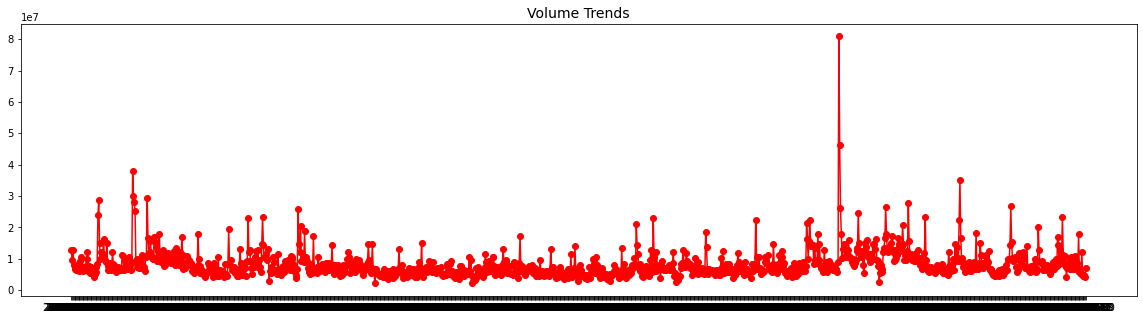

In [40]:
# Plot the Volume trends over the period
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(pandas_df['Date'], pandas_df['Volume'], color='red', marker='o')
plt.title('Volume Trends', fontsize=14)
plt.show()

There is a general trend in the volumes  of the tranded stock over the period,with 2 outliers noted from the graph

In [33]:
# Write the SQL query
query9 = 'select Date, max(Volume) from safstock2012_2016 group by 1 order by 2 desc'

# Call sqlCtx.sql() and pass in the query
# Display the results
sqlCtx.sql(query9).show(5)

+----------+-----------+
|      Date|max(Volume)|
+----------+-----------+
|2015-10-14|80898100.00|
|2015-10-15|46253500.00|
|2012-04-23|38007300.00|
|2016-05-19|35076700.00|
|2012-04-24|30090600.00|
+----------+-----------+
only showing top 5 rows



It would seem that the highest volume of trades attained 80,898,100.00  on 2015-10-14 could have been an outlier, as this is almost double the second highest Volume over the period. 
There is however something to note: The top 2 highest volumes are in the month of Oct 2015, 1 day apart. Could this be of interest in the analysis?

## Findings

* 2015-01-13 had the peak High price of 90.97
* The mean of the Close column is 72.39
* The maximum Volume was 80,898,100 and the minimum 2,094,900 shares
* The Close was lower than 60 dollars for 81 days in the period
* The High was greater than 80 dollars 8.43% of the time
* High and Volume have a negative correlation of -0.34

* Max High per year is:

1. 2012:77.6
2. 2013:81.37
3. 2014:88.09
4. 2015:90.97
5. 2016:75.19

* Average Close for each month:

1. Jan:71.45
2. Feb:71.31
3. Mar:71.78
4. Apr:72.97
5. May:72.31
6. Jun:72.5
7. Jul:74.44
8. Aug:73.03
9. Sep:72.18
10. Oct:71.58
11. Nov:72.11
12. Dec:72.85

## Summary
* There is a general trend in the volumes of the traded stock over the period,with 2 outliers noted from the graph
* It would seem that the highest volumes of trades attained 80,898,100.00 on 2015-10-14 could have been an outlier, as this is almost double the second highest Volume over the period. There is however something to note: The top 2 highest volumes are in the month of Oct 2015, 1 day apart. Could this be of interest in the analysis?

## 7. Follow up questions

### a). Did we have the right data?

Yes

### b). Do we need other data to answer our question?

No

### c). Did we have the right question?

Yes we did